In [1]:
from configparser import ConfigParser

In [2]:
cfg = 'config/sphereConfig_bias.cfg'

config = ConfigParser()
config.optionxform = str
config.read(cfg)

base = config['file']['base']
data = config['file']['data']
pairing = config['pairing']['scheme']
# pairing_type = pairing.split('_')[0]

variables = config['BDT']['variables']
print(variables)
variables = variables.split(', ')

pt6bsum, dR6bmin, dEta6bmax, HX_pt, HY1_pt, HY2_pt, HX_dr, HY1_dr, HY2_dr, HX_m, HY1_m, HY2_m, HX_HY1_dEta, HY1_HY2_dEta, HY2_HX_dEta, HX_HY1_dPhi, HY1_HY2_dPhi, HY2_HX_dPhi, HX_costheta, HY1_costheta, HY2_costheta


In [4]:
indir = f"root://cmseos.fnal.gov/{base}"
datFileName = f"{indir}{data}"
datTree = Signal(datFileName)
region_type = 'sphere'
datTree.spherical_region(config)
print(datTree.A_CR_mask.sum(), datTree.V_SR_mask.sum(), datTree.V_CR_mask.sum())
datTree.bdt_process(region_type, config)

VR_center   = 178
SR_edge     = 35
CR_edge     = 40
--------------------

15026 21923 8650
.. training BDT in V_CR
.. calling reweight.GBReweighter
.. calling reweight.FoldingReweighter
.. calling reweighter.fit
.. predicting weights in CR
.. performing kstest
[FAILURE] ks-val = 0.015
.. predicting weights in V_SR
[FAILURE] ks-val = 0.035
[FAILURE] ks-val = 0.045
.. training BDT in A_CR
.. calling reweight.GBReweighter
.. calling reweight.FoldingReweighter
.. calling reweighter.fit
[FAILURE] ks-val = 0.011
.. predicting weights in A_SR



In [5]:
V_SR_mask = datTree.V_SR_mask
V_CR_mask = datTree.V_CR_mask

V_SRhs_mask = datTree.V_SRhs_mask
V_SRls_mask = datTree.V_SRls_mask

V_CRhs_mask = datTree.V_CRhs_mask
V_CRls_mask = datTree.V_CRls_mask

V_mask = np.logical_or(V_SR_mask, V_CR_mask)

ls_mask = datTree.ls_mask
hs_mask = datTree.hs_mask

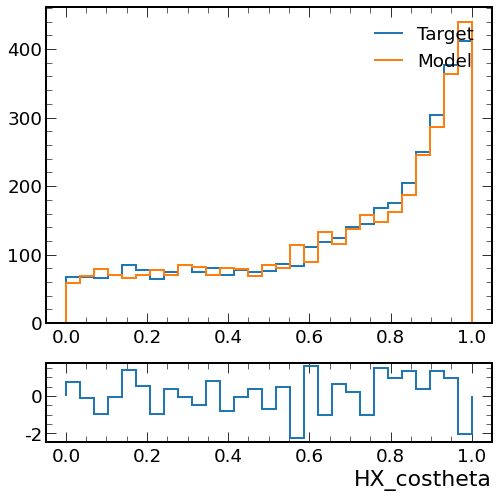

In [13]:
var = 'HX_costheta'
bins = np.linspace(0, 1, 30)

original = datTree.np(var)[V_SRls_mask]
target = datTree.np(var)[V_SRhs_mask]
norm = len(target)/sum(datTree.V_SR_weights)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8,8), gridspec_kw={'height_ratios':[4,1]})
pull = Ratio([target, original],  bins=bins, axs=axs, labels=['Target','Model'], xlabel=var, weights=[None, datTree.V_SR_weights*norm], pull=True)

